In [3]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd



import pandas.io.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
def compTrade(dt):
    d=0.01
    dt['reg']=np.where(dt['dmacd']>d,1,0)
    dt['reg']=np.where(dt['dmacd']<-d,-1,dt['reg'])
    dt['strategy']=dt['reg'].shift(1)*dt['market']
    return dt

def macd(name):
    serdate='2015-1-1'
    sdate='2015-01-02'

    DT = web.DataReader(name, data_source='yahoo',
                 start=serdate)


    DT['CloseN'] = DT['Close']/DT['Close'][sdate]

    
    DT['Date'] = pd.to_datetime( DT.index)
    tempds = DT.sort('Date',ascending = True )
    cs = tempds['Close']
    macd=pd.ewma(cs,span=12)-pd.ewma(cs,span=26)
    signal=pd.ewma(macd,span=9)
    
    DT['macd'] = macd
    DT['signal'] = signal
    DT['dmacd'] = macd-signal
    DT['market']=np.log(cs/cs.shift(1))
    return compTrade(DT)


def plotMacd(DT):
    fig, axs = plt.subplots(4,1,figsize=(42, 60))
    
    DT['CloseN'].plot(ax=axs[0], grid=True)
    DT['macd'].plot(ax=axs[1], grid=True)
    DT['signal'].plot(ax=axs[1], grid=True)
    DT['dmacd'].plot(ax=axs[2], grid=True)
    DT['reg'].plot(ax=axs[2], grid=True)
    DT[['market','strategy']].cumsum().apply(np.exp).plot(ax=axs[3], grid=True)
    
def doCumsum(dt):
    dcumsum = dt[['market','strategy']].cumsum()    
    dcumsum['delta']=(dcumsum['strategy']-dcumsum['market'])*100
    mean=dcumsum['delta'].mean()
    rmse = np.sqrt(((dcumsum['delta']-mean)**2).mean())
    win=np.compress(dcumsum['delta']>0.001,dcumsum['delta']).size*1.0/len(dcumsum['delta'])*100

    print mean,rmse, win
    return dcumsum
    
    

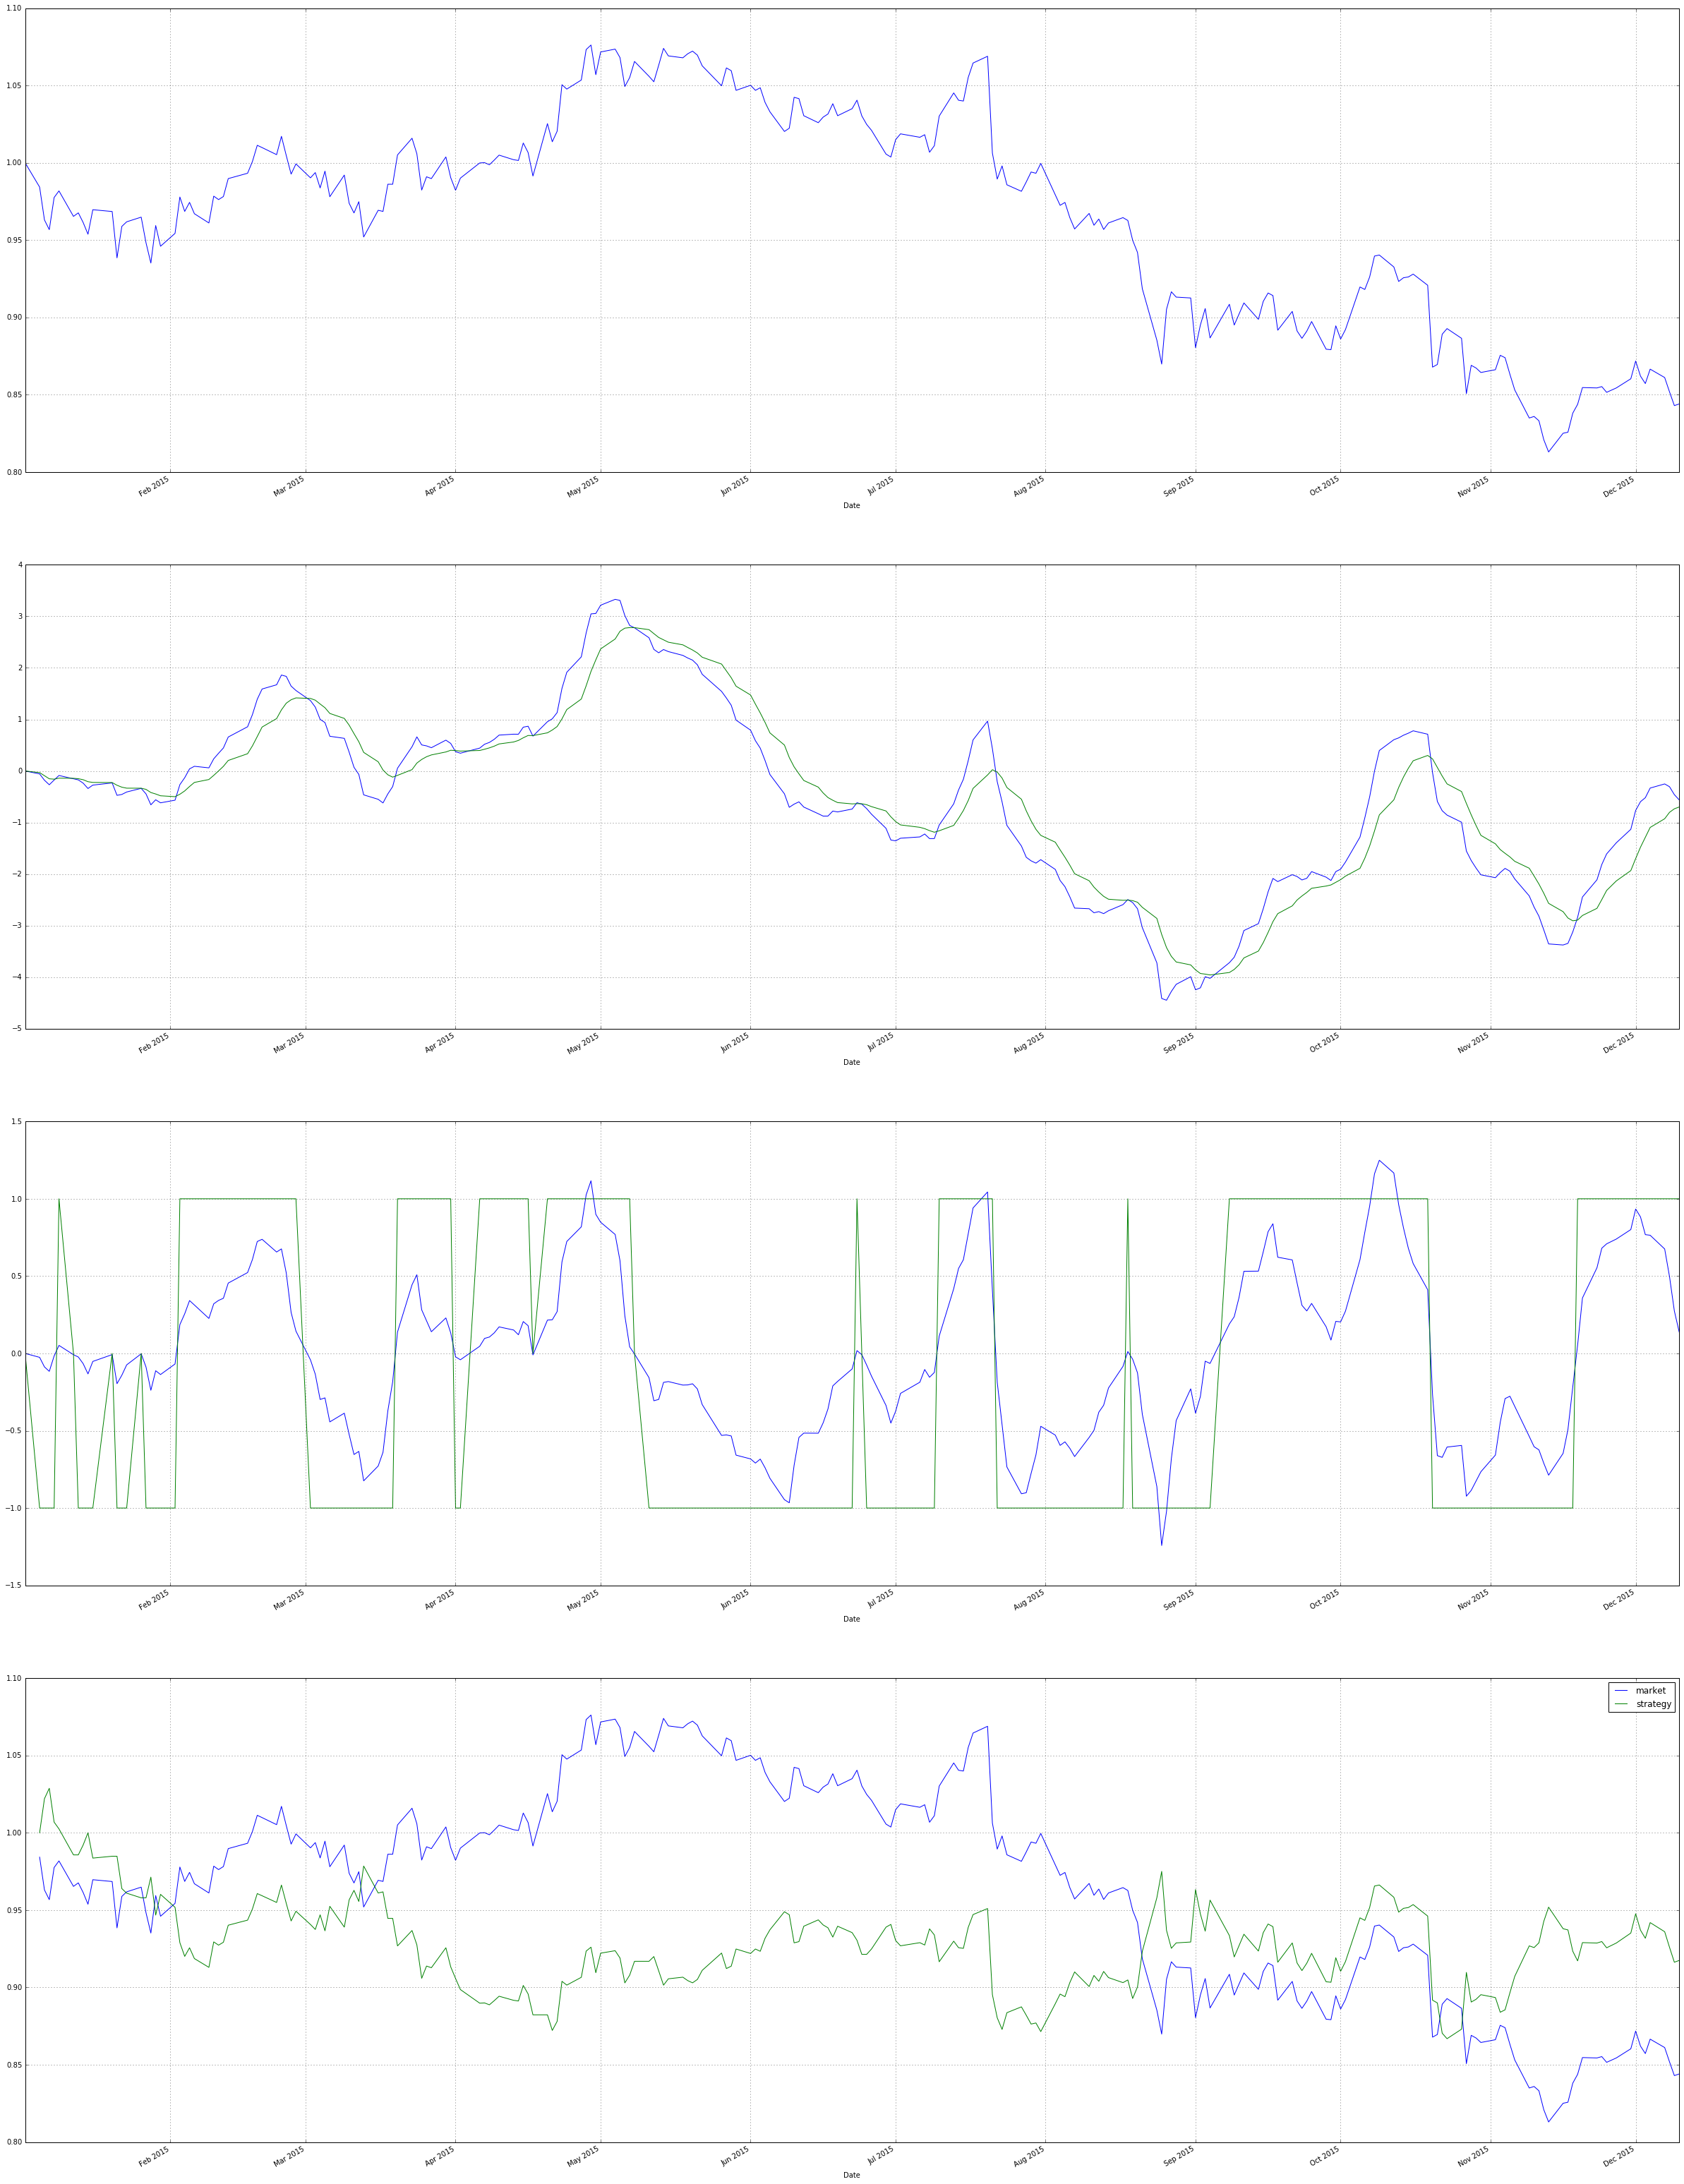

In [63]:
dt = macd('ibm')
plotMacd(dt)




-3.77558502481 7.91605396428 38.6554621849


Date
2015-12-04    8.340809
2015-12-07    8.340809
2015-12-08    8.340809
2015-12-09    8.340809
2015-12-10    8.340809
Name: delta, dtype: float64

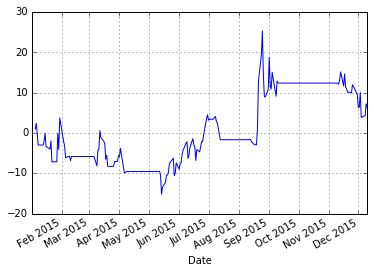

In [64]:
dcs=doCumsum(dt)
dcumsum['delta'].plot(grid=True)
dcs['delta'].tail()

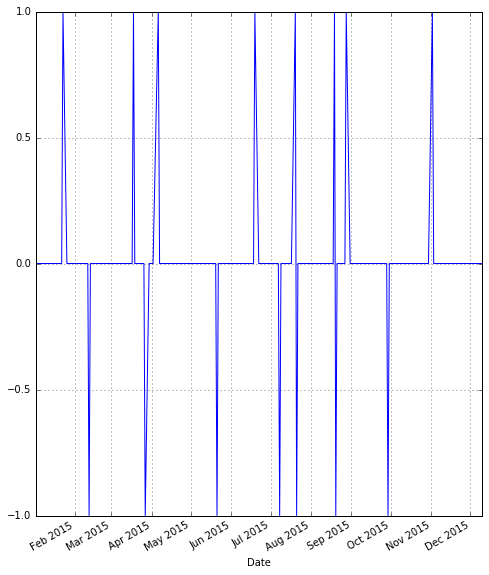

In [24]:
dt['trade'].plot(figsize=(8, 10), grid=True)






In [34]:
print 'signal'
signal.head()


signal


Date
2015-01-02    0.000000
2015-01-05   -0.114922
2015-01-06   -0.160723
2015-01-07   -0.188273
2015-01-08   -0.209146
Name: Close, dtype: float64